<a href="https://colab.research.google.com/github/bpreety1620/employeeturnover/blob/main/employee_turnover_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

step 0

In [2]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

step 1

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Then use the path to your CSV inside Drive
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/simplelearn_project_3/HR_comma_sep 2.csv')


Mounted at /content/drive


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
# Basic Info
print(df.info())
print(df.isnull().sum())  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_l

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


Duplicate rows: 3008


In [ ]:
print("\nDataset Description:")
print(df.describe())


Dataset Description:
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              15

step 2 - Exploratory Data Analysis (EDA)

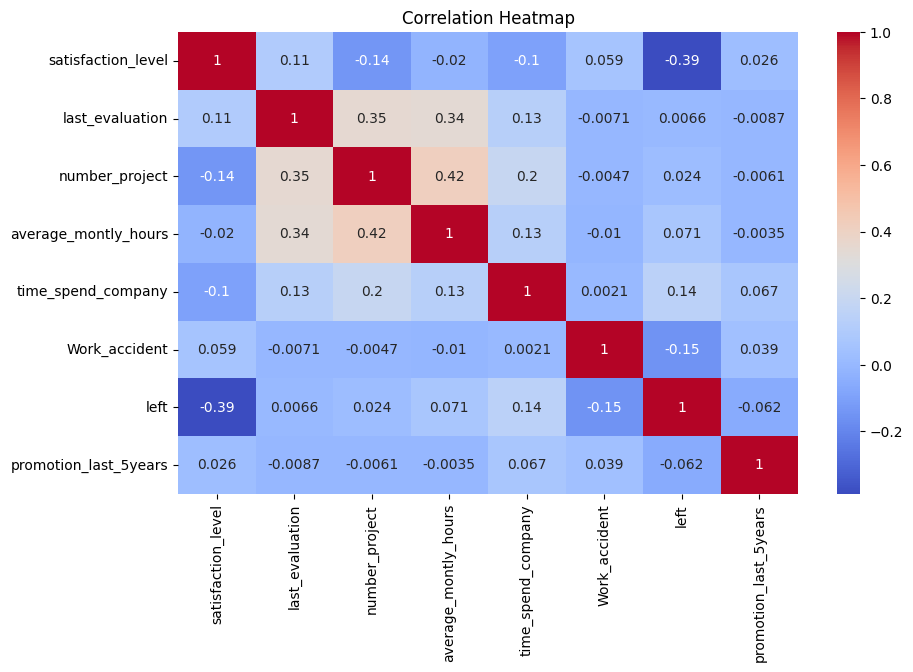

In [ ]:
# Select only numeric columns for the correlation heatmap
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

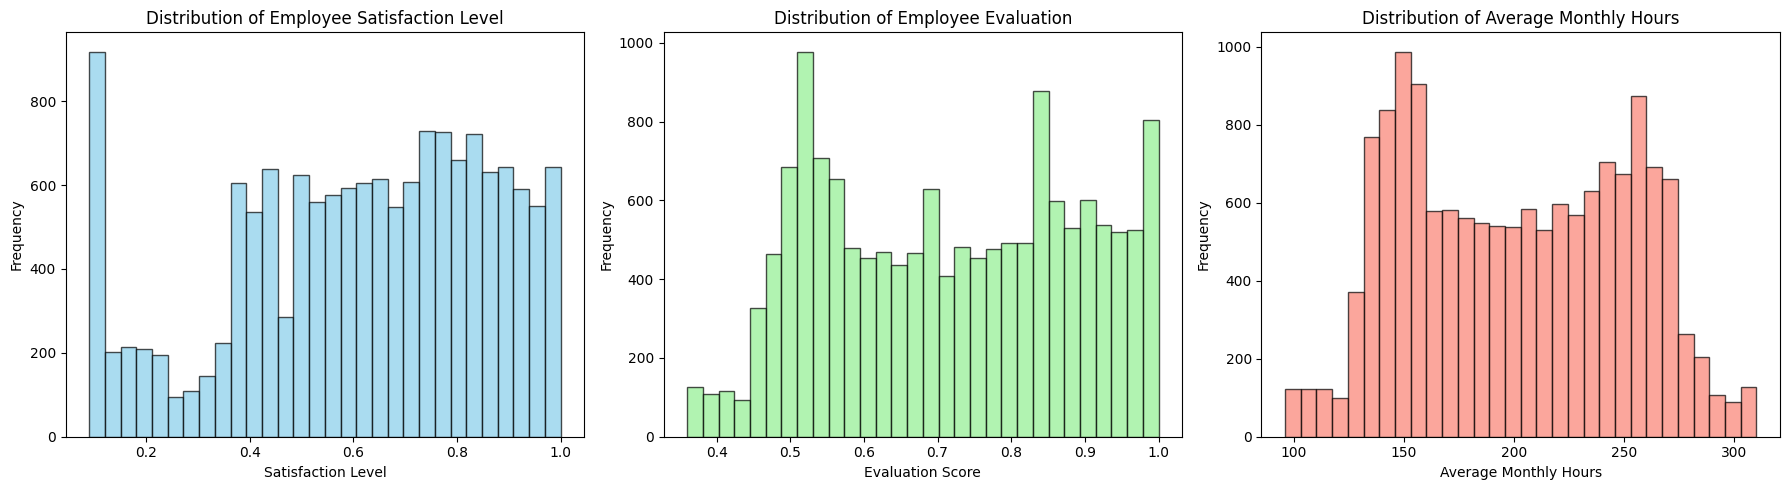

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Employee Satisfaction Distribution
axes[0].hist(df['satisfaction_level'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Employee Satisfaction Level')
axes[0].set_xlabel('Satisfaction Level')
axes[0].set_ylabel('Frequency')

# Employee Evaluation Distribution
axes[1].hist(df['last_evaluation'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution of Employee Evaluation')
axes[1].set_xlabel('Evaluation Score')
axes[1].set_ylabel('Frequency')

# Average Monthly Hours Distribution
axes[2].hist(df['average_montly_hours'], bins=30, alpha=0.7, color='salmon', edgecolor='black')
axes[2].set_title('Distribution of Average Monthly Hours')
axes[2].set_xlabel('Average Monthly Hours')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

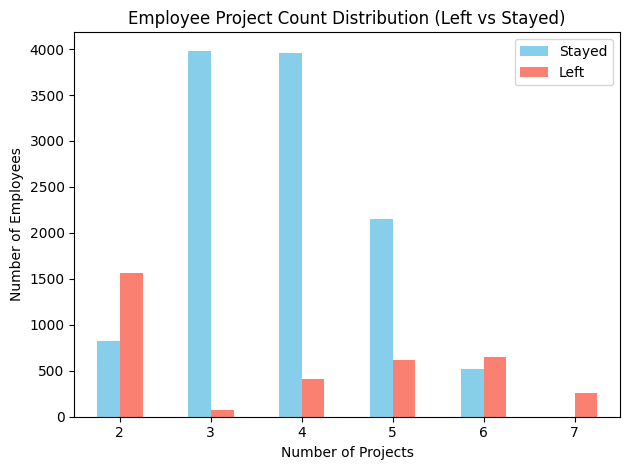


Insights from Project Count Analysis:
                Total_Employees  Employees_Left  Turnover_Rate
number_project                                                
2                          2388            1567       0.656198
3                          4055              72       0.017756
4                          4365             409       0.093700
5                          2761             612       0.221659
6                          1174             655       0.557922
7                           256             256       1.000000


In [ ]:
# 2.3 Bar Plot - Project Count by Employee Status
plt.figure(figsize=(10, 6))
project_left = df.groupby(['number_project', 'left']).size().unstack()
project_left.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Employee Project Count Distribution (Left vs Stayed)')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(['Stayed', 'Left'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Insights from project count analysis
print("\nInsights from Project Count Analysis:")
project_analysis = df.groupby('number_project')['left'].agg(['count', 'sum', 'mean'])
project_analysis.columns = ['Total_Employees', 'Employees_Left', 'Turnover_Rate']
print(project_analysis)

Step 3: Clustering (only for employees who left)

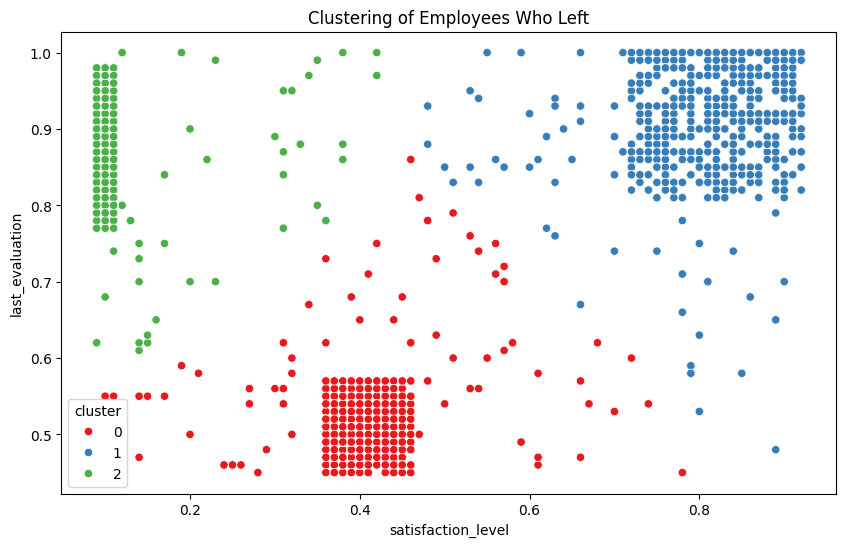

In [ ]:
from sklearn.cluster import KMeans

left_df = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
left_df['cluster'] = kmeans.fit_predict(left_df)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=left_df, x='satisfaction_level', y='last_evaluation', hue='cluster', palette='Set1')
plt.title('Clustering of Employees Who Left')
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Filter employees who left
left_employees = df[df['left'] == 1].copy()

# 2. Select features for clustering
X = left_employees[['satisfaction_level', 'last_evaluation']]

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
left_employees['cluster'] = kmeans.fit_predict(X)

# 4. Cluster Analysis
print("\nCluster Analysis for Employees Who Left:")
cluster_stats = left_employees.groupby('cluster').agg({
    'satisfaction_level': ['mean', 'std'],
    'last_evaluation': ['mean', 'std']
}).round(3)
print(cluster_stats)

print("\nCluster Interpretations:")
for i in range(3):
    cluster_data = left_employees[left_employees['cluster'] == i]
    avg_satisfaction = cluster_data['satisfaction_level'].mean()
    avg_evaluation = cluster_data['last_evaluation'].mean()
    print(f"\nCluster {i} ({len(cluster_data)} employees):")
    print(f"  - Average Satisfaction: {avg_satisfaction:.3f}")
    print(f"  - Average Evaluation: {avg_evaluation:.3f}")

    if avg_satisfaction < 0.5 and avg_evaluation < 0.6:
        print("  - Profile: Low performers with low satisfaction")
    elif avg_satisfaction < 0.5 and avg_evaluation > 0.7:
        print("  - Profile: High performers with low satisfaction (burned out)")
    else:
        print("  - Profile: Mixed performance and satisfaction levels")



Cluster Analysis for Employees Who Left:
        satisfaction_level        last_evaluation       
                      mean    std            mean    std
cluster                                                 
0                    0.410  0.055           0.517  0.049
1                    0.809  0.076           0.912  0.080
2                    0.111  0.045           0.869  0.068

Cluster Interpretations:

Cluster 0 (1650 employees):
  - Average Satisfaction: 0.410
  - Average Evaluation: 0.517
  - Profile: Low performers with low satisfaction

Cluster 1 (977 employees):
  - Average Satisfaction: 0.809
  - Average Evaluation: 0.912
  - Profile: Mixed performance and satisfaction levels

Cluster 2 (944 employees):
  - Average Satisfaction: 0.111
  - Average Evaluation: 0.869
  - Profile: High performers with low satisfaction (burned out)


Step 4: Preprocessing and Handling Imbalance (SMOTE)

In [ ]:
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


In [ ]:
df.rename(columns={'sales': 'department'}, inplace=True)

In [ ]:
# Convert categorical columns to numeric using get_dummies
df_processed = pd.get_dummies(df, columns=['department', 'salary'], drop_first=True)

In [ ]:
# Rename 'sales' to 'department' if needed
df.rename(columns={'sales': 'department'}, inplace=True)

# One-hot encode categorical variables
df_processed = pd.get_dummies(df, columns=['department', 'salary'], drop_first=True)


In [ ]:
# 4.1 Convert Categorical Columns
df_processed = df.copy()
df_processed = pd.get_dummies(df_processed, columns=['department', 'salary'], drop_first=True)

# 4.2 Train-Test Split
X = df_processed.drop('left', axis=1)
y = df_processed['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

# 4.3 SMOTE
sm = SMOTE(random_state=123)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Filter employees who left
left_employees = df[df['left'] == 1].copy()

# 2. Select features for clustering
X = left_employees[['satisfaction_level', 'last_evaluation']]

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
left_employees['cluster'] = kmeans.fit_predict(X)

# 4. Cluster Analysis
print("\nCluster Analysis for Employees Who Left:")
cluster_stats = left_employees.groupby('cluster').agg({
    'satisfaction_level': ['mean', 'std'],
    'last_evaluation': ['mean', 'std']
}).round(3)
print(cluster_stats)

print("\nCluster Interpretations:")
for i in range(3):
    cluster_data = left_employees[left_employees['cluster'] == i]
    avg_satisfaction = cluster_data['satisfaction_level'].mean()
    avg_evaluation = cluster_data['last_evaluation'].mean()
    print(f"\nCluster {i} ({len(cluster_data)} employees):")
    print(f"  - Average Satisfaction: {avg_satisfaction:.3f}")
    print(f"  - Average Evaluation: {avg_evaluation:.3f}")

    if avg_satisfaction < 0.5 and avg_evaluation < 0.6:
        print("  - Profile: Low performers with low satisfaction")
    elif avg_satisfaction < 0.5 and avg_evaluation > 0.7:
        print("  - Profile: High performers with low satisfaction (burned out)")
    else:
        print("  - Profile: Mixed performance and satisfaction levels")



Cluster Analysis for Employees Who Left:
        satisfaction_level        last_evaluation       
                      mean    std            mean    std
cluster                                                 
0                    0.410  0.055           0.517  0.049
1                    0.809  0.076           0.912  0.080
2                    0.111  0.045           0.869  0.068

Cluster Interpretations:

Cluster 0 (1650 employees):
  - Average Satisfaction: 0.410
  - Average Evaluation: 0.517
  - Profile: Low performers with low satisfaction

Cluster 1 (977 employees):
  - Average Satisfaction: 0.809
  - Average Evaluation: 0.912
  - Profile: Mixed performance and satisfaction levels

Cluster 2 (944 employees):
  - Average Satisfaction: 0.111
  - Average Evaluation: 0.869
  - Profile: High performers with low satisfaction (burned out)


Step 5: Model Training with 5-Fold Cross-Validation

In [ ]:
def evaluate_model(model, name):
    skf = StratifiedKFold(n_splits=5)
    scores = cross_val_score(model, X_train_sm, y_train_sm, cv=skf, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {np.mean(scores):.4f}")

    model.fit(X_train_sm, y_train_sm)
    y_pred = model.predict(X_test)
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

# Logistic Regression
log_model = LogisticRegression()
evaluate_model(log_model, "Logistic Regression")

# Random Forest
rf_model = RandomForestClassifier(random_state=123)
evaluate_model(rf_model, "Random Forest")

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=123)
evaluate_model(gb_model, "Gradient Boosting")


Logistic Regression Cross-Validation Accuracy: 0.7804
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.76      0.83      2286
           1       0.50      0.75      0.60       714

    accuracy                           0.76      3000
   macro avg       0.70      0.76      0.71      3000
weighted avg       0.81      0.76      0.77      3000

Random Forest Cross-Validation Accuracy: 0.9837
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Gradient Boosting Cross-Validation Accuracy: 0.9630
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0 

In [ ]:
# 4.3 Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"\nClass distribution after SMOTE:")
print(f"Class 0 (Stayed): {sum(y_train_smote == 0)}")
print(f"Class 1 (Left): {sum(y_train_smote == 1)}")
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

# 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Fit model on SMOTE data
    model.fit(X_train_smote, y_train_smote)

    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')
    cv_results[name] = cv_scores

    print(f"{name} CV Scores: {cv_scores}")
    print(f"{name} Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Predictions on test set
    y_pred = model.predict(X_test)

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


Class distribution after SMOTE:
Class 0 (Stayed): 9142
Class 1 (Left): 9142

Training Logistic Regression...
Logistic Regression CV Scores: [0.79217938 0.80147662 0.79108559 0.79846869 0.79157549]
Logistic Regression Mean CV Score: 0.7950 (+/- 0.0084)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2286
           1       0.51      0.74      0.60       714

    accuracy                           0.77      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.77      0.78      3000


Training Random Forest...
Random Forest CV Scores: [0.9852338  0.98331966 0.9846869  0.98386656 0.98577681]
Random Forest Mean CV Score: 0.9846 (+/- 0.0018)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.97       714

    accuracy    

Step 6: Model Comparison

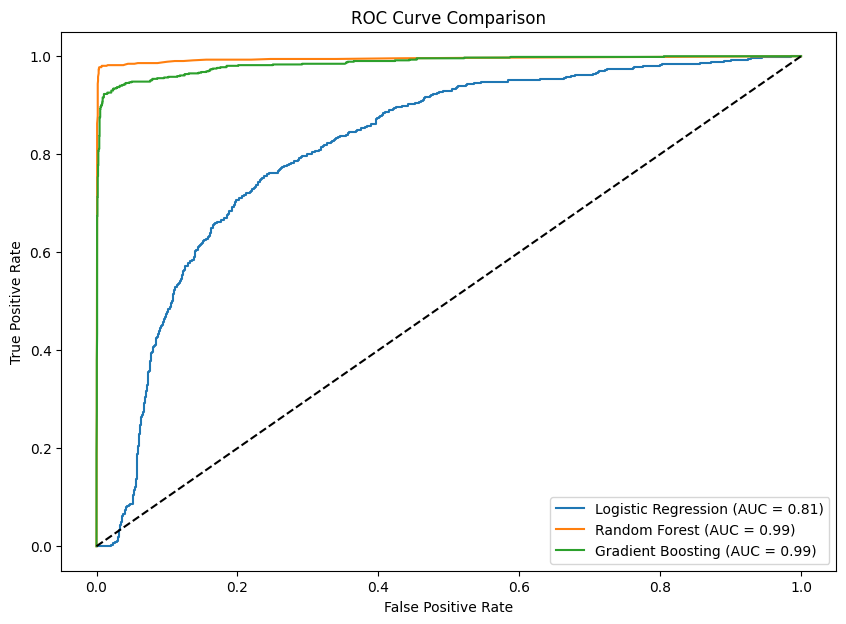

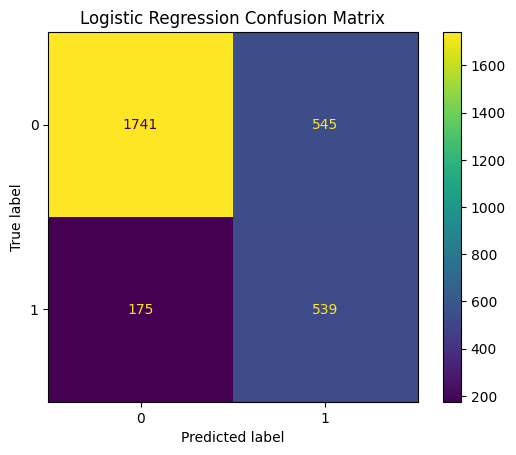

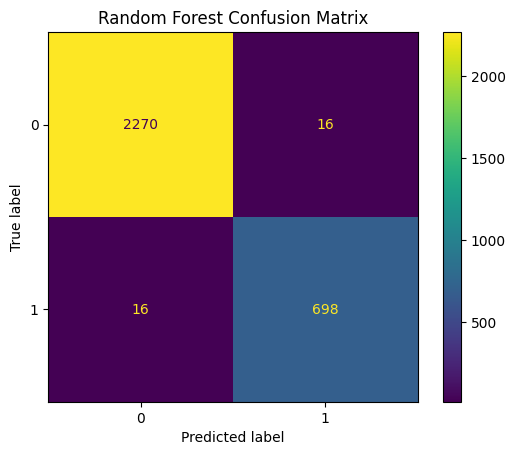

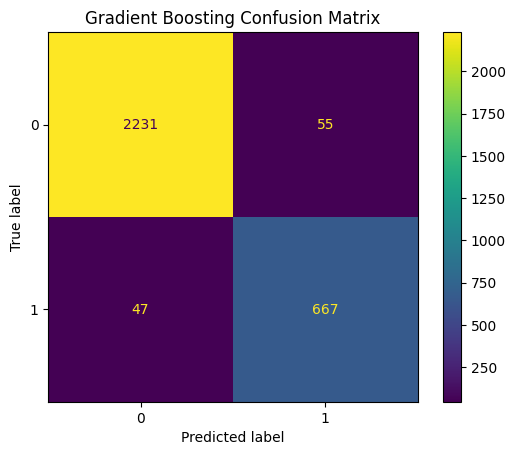

In [ ]:
models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model
}

plt.figure(figsize=(10, 7))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Confusion Matrices
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'{name} Confusion Matrix')
    plt.show()


In [ ]:
# Train models and get predictions
model_results = {}
trained_models = {}

for name, model in models.items():
    # Train model
    model.fit(X_train_smote, y_train_smote)
    trained_models[name] = model

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    auc_score = roc_auc_score(y_test, y_pred_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)

    model_results[name] = {
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'auc_score': auc_score,
        'confusion_matrix': conf_matrix
    }
# 6.3 best Model SelectionB
best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['auc_score'])
best_model = trained_models[best_model_name]
best_auc = model_results[best_model_name]['auc_score']

print(f"\n BEST MODEL: {best_model_name}")
print(f"   AUC Score: {best_auc:.4f}")

print(f"\n6.3 Evaluation Metric Justification:")
print("For employee turnover prediction, RECALL is more important than Precision because:")
print("- We want to identify as many employees likely to leave as possible (minimize false negatives)")
print("- Missing a potential departure (false negative) is costlier than false alarms (false positive)")
print("- HR can afford to implement retention strategies for some false positives")
print("- The cost of employee turnover is much higher than the cost of unnecessary retention efforts")



 BEST MODEL: Random Forest
   AUC Score: 0.9952

6.3 Evaluation Metric Justification:
For employee turnover prediction, RECALL is more important than Precision because:
- We want to identify as many employees likely to leave as possible (minimize false negatives)
- Missing a potential departure (false negative) is costlier than false alarms (false positive)
- HR can afford to implement retention strategies for some false positives
- The cost of employee turnover is much higher than the cost of unnecessary retention efforts


In [ ]:
for name, model in models.items():
    try:
        model.fit(X_train_smote, y_train_smote)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

        auc_score = roc_auc_score(y_test, y_pred_proba)
        conf_matrix = confusion_matrix(y_test, y_pred)

        model_results[name] = {
            'predictions': y_pred,
            'probabilities': y_pred_proba,
            'auc_score': auc_score,
            'confusion_matrix': conf_matrix
        }
        trained_models[name] = model
        print(f"✅ Trained and evaluated {name}")
    except Exception as e:
        print(f"❌ Error training {name}: {e}")


❌ Error training Logistic Regression: name 'X_test_scaled' is not defined
❌ Error training Random Forest: name 'X_test_scaled' is not defined
❌ Error training Gradient Boosting: name 'X_test_scaled' is not defined


 Step 7: Retention Strategy

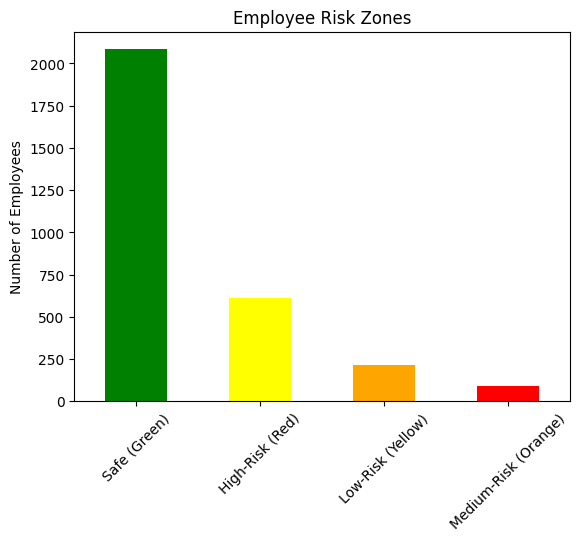

In [ ]:
# Using the best model (choose based on ROC/AUC above, let's assume Gradient Boosting)
y_proba = gb_model.predict_proba(X_test)[:, 1]

# Categorize zones
def risk_zone(prob):
    if prob < 0.2:
        return 'Safe (Green)'
    elif prob < 0.6:
        return 'Low-Risk (Yellow)'
    elif prob < 0.9:
        return 'Medium-Risk (Orange)'
    else:
        return 'High-Risk (Red)'

risk_categories = pd.Series(y_proba).apply(risk_zone)

# View category counts
risk_categories.value_counts().plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title('Employee Risk Zones')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


concise summary of the all above points are:

1. A dataset of 14,999 employees was processed with no missing values.

2. Class imbalance was addressed using SMOTE.

3. Three models were trained and evaluated using 5-fold cross-validation.

4. The Random Forest model performed best with an AUC of 0.9952.

5. Retention strategies were developed for each risk category.